In [1]:
import anndata
import scanpy as sc
import pandas as pd
import os
import hisepy

In [2]:
def read_adata_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file)
    return adata

In [3]:
def read_obs_uuid(h5ad_uuid):
    h5ad_path = '/home/jupyter/cache/{u}'.format(u = h5ad_uuid)
    if not os.path.isdir(h5ad_path):
        hise_res = hisepy.reader.cache_files([h5ad_uuid])
    h5ad_filename = os.listdir(h5ad_path)[0]
    h5ad_file = '{p}/{f}'.format(p = h5ad_path, f = h5ad_filename)
    adata = sc.read_h5ad(h5ad_file, backed = 'r').obs.copy()
    return adata

In [4]:
def read_parquet_uuid(parquet_uuid):
    pq_path = '/home/jupyter/cache/{u}'.format(u = parquet_uuid)
    if not os.path.isdir(pq_path):
        hise_res = hisepy.reader.cache_files([parquet_uuid])
    pq_filename = os.listdir(pq_path)[0]
    pq_file = '{p}/{f}'.format(p = pq_path, f = pq_filename)
    df = pd.read_parquet(pq_file)
    return df

In [5]:
anno_cols = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3']

In [6]:
cell_class = 'myeloid'

## Read new subclustering results from HISE

In [7]:
new_h5ad_uuid = 'c38df326-662d-459b-982d-0186c022f70d'
new_adata = read_adata_uuid(new_h5ad_uuid)

downloading fileID: c38df326-662d-459b-982d-0186c022f70d
Files have been successfully downloaded!


In [8]:
new_pq_uuid = 'eff741c2-b0fe-4dff-9914-ff5dc89ee95e'
new_anno = read_parquet_uuid(new_pq_uuid)

downloading fileID: eff741c2-b0fe-4dff-9914-ff5dc89ee95e
Files have been successfully downloaded!


In [9]:
new_obs = new_adata.obs.copy()
new_obs = new_obs.reset_index(drop = True)
new_obs = new_obs.merge(new_anno, on = 'barcodes', how = 'left')
new_obs['AIFI_L1'] = new_obs['AIFI_L1'].astype('category')
new_obs['AIFI_L2'] = new_obs['AIFI_L2'].astype('category')
new_obs['AIFI_L3'] = new_obs['AIFI_L3'].astype('category')
new_obs = new_obs.set_index('barcodes', drop = False)

In [10]:
new_obs['AIFI_L1'].value_counts()

AIFI_L1
Monocyte    327919
Doublet      46150
DC           23287
Name: count, dtype: int64

In [11]:
sum(new_obs['AIFI_L1'].isna())

0

In [12]:
new_anno.obs = new_obs

/tmp/ipykernel_15485/108851738.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  new_anno.obs = new_obs


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


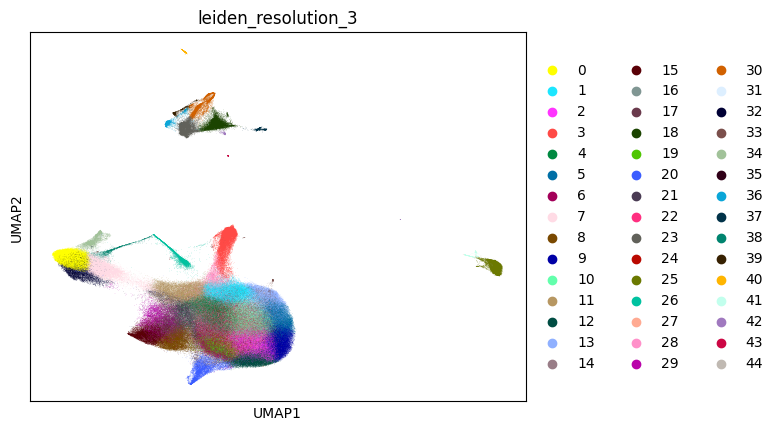

In [91]:
sc.pl.umap(
    new_adata,
    color = 'leiden_resolution_3'
)

In [14]:
temp_adata = anndata.AnnData(
    X = new_adata.X,
    obs = new_obs
)

In [15]:
new_adata.obs = temp_adata.obs

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

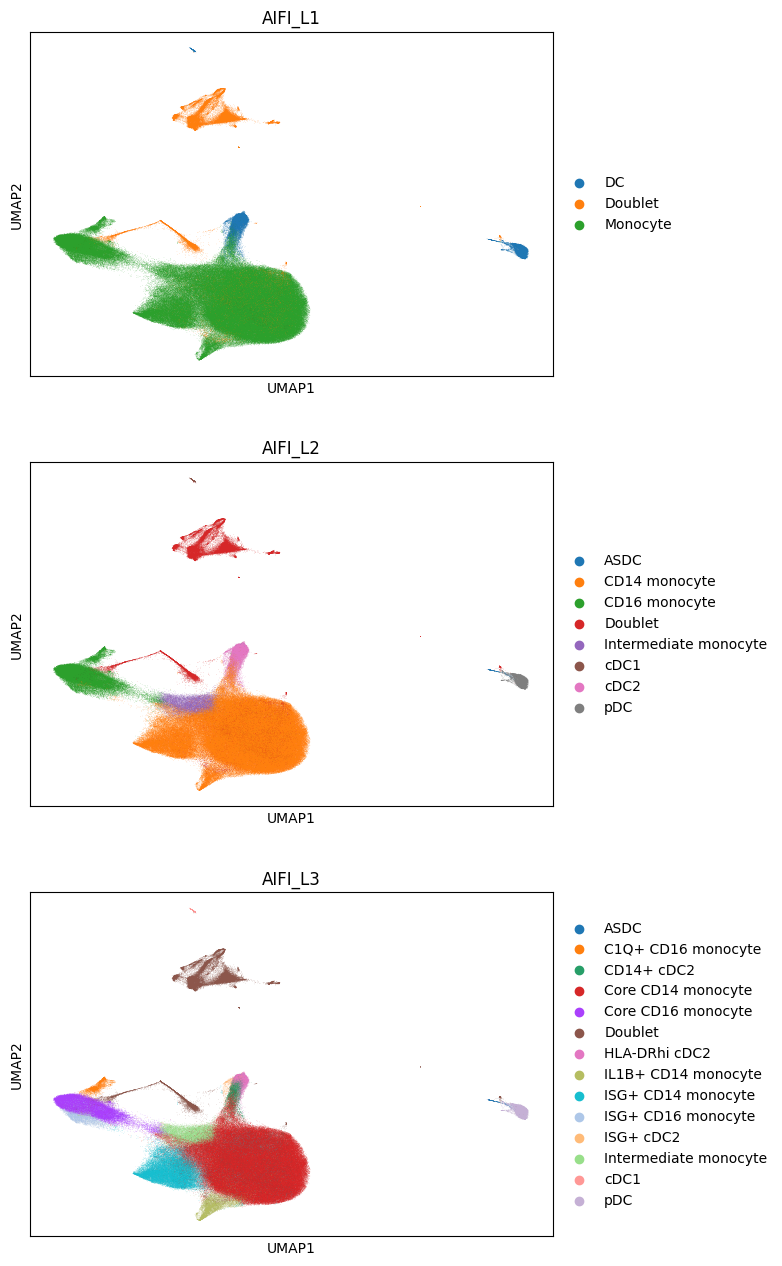

In [16]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'],
    ncols = 1
)

In [17]:
new_labels = new_adata.obs[['barcodes'] + anno_cols].copy()
for col in anno_cols:
    new_labels = new_labels.rename({col: 'new_' + col}, axis = 1)
new_labels = new_labels.reset_index(drop = True)

## Read old subclustering results from HISE

In [18]:
old_h5ad_uuid = '8119dcb4-5c0b-42f7-82fa-11ab04fad221'
old_adata = read_adata_uuid(old_h5ad_uuid)

downloading fileID: 8119dcb4-5c0b-42f7-82fa-11ab04fad221
Files have been successfully downloaded!


/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
old_pq_uuid = '948ff860-9ec6-4b37-8040-06a2ee235859'
old_anno = read_parquet_uuid(old_pq_uuid)

downloading fileID: 948ff860-9ec6-4b37-8040-06a2ee235859
Files have been successfully downloaded!


In [23]:
old_anno = old_anno.set_index('barcodes', drop = False)

In [24]:
old_adata.obs = old_anno

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


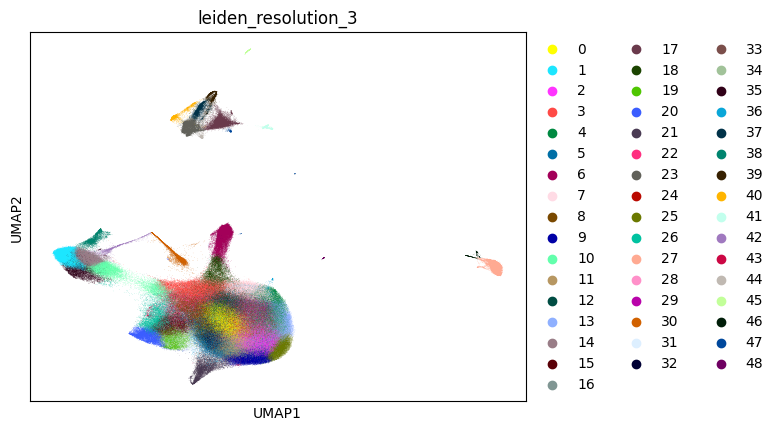

In [26]:
sc.pl.umap(
    old_adata,
    color = ['leiden_resolution_3'],
    ncols = 1
)

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

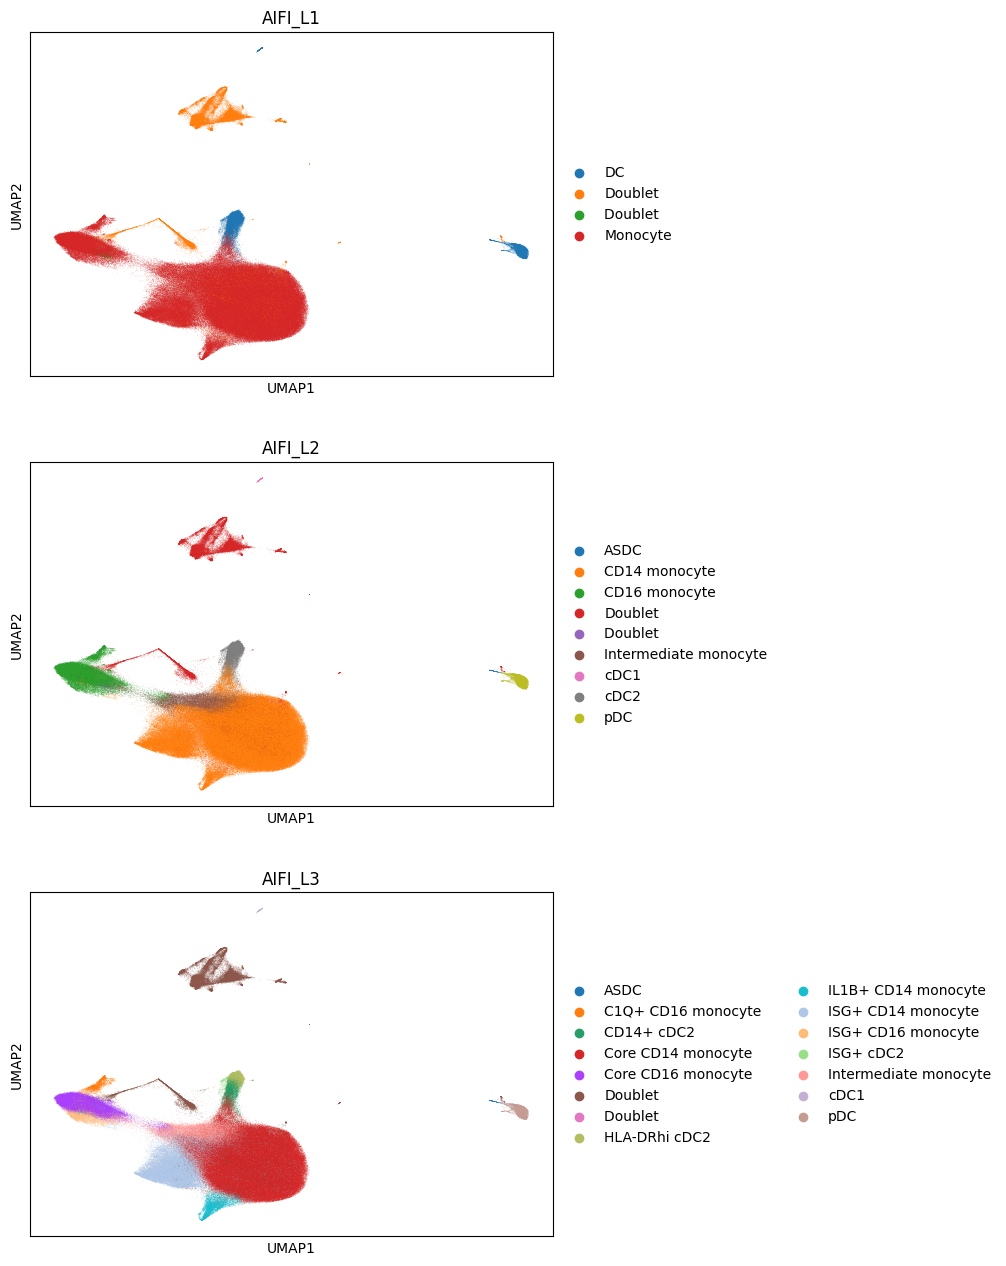

In [27]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L1', 'AIFI_L2', 'AIFI_L3'],
    ncols = 1
)

In [28]:
old_labels = old_adata.obs[['barcodes'] + anno_cols].copy()
for col in anno_cols:
    old_labels = old_labels.rename({col: 'old_' + col}, axis = 1)
old_labels = old_labels.reset_index(drop = True)

# Comparisons

In [36]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

## L1 Comparison

In [37]:
level = 'L1'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [38]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [39]:
n_total = comp.shape[0]
n_total

398277

How many had identical assignments?

In [40]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

392223

What fraction is that?

In [41]:
frac_ident = n_ident / n_total
frac_ident

0.9847995239494121

What are the counts for each category in old and new annotations?

In [42]:
comp[old_col].value_counts()

old_AIFI_L1
Monocyte    327174
Doublet      46107
DC           23655
Missing        751
Doublet        590
Name: count, dtype: int64

In [43]:
comp[new_col].value_counts()

new_AIFI_L1
Monocyte    327919
Doublet      46150
DC           23287
Missing        921
Doublet          0
Name: count, dtype: int64

What percentage of old labels changed?

In [44]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

new_AIFI_L1
Monocyte      0.227708
Doublet       0.093261
DC           -1.555696
Missing      22.636485
Doublet    -100.000000
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [45]:
diff = comp[comp[old_col] != comp[new_col]]

In [46]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L1  new_AIFI_L1
Monocyte     Doublet        1157
DC           Monocyte       1002
Doublet      Monocyte        923
             Missing         877
Missing      Doublet         697
Monocyte     DC              629
Doublet      Monocyte        582
Doublet      DC               50
Missing      Monocyte         42
DC           Doublet          36
             Missing          21
Monocyte     Missing          18
Missing      DC               12
Doublet      Missing           5
             Doublet           3
Name: count, dtype: int64

Generate a plot on old coordinates showing where things differ

In [47]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [48]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

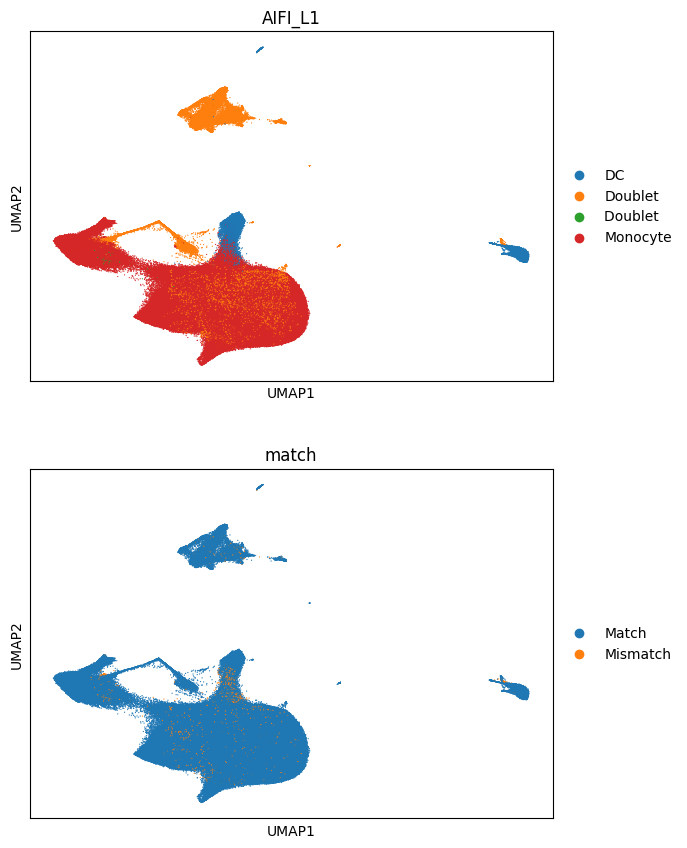

In [49]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L1', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [50]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [51]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

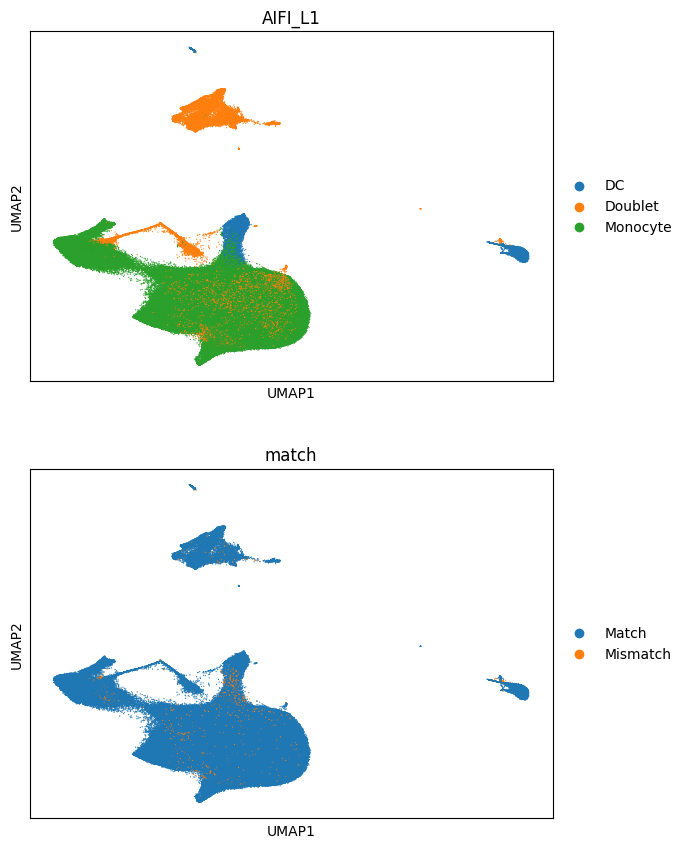

In [52]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L1', 'match'],
    ncols = 1,
    size = 3
)

## L2 Comparison

In [53]:
level = 'L2'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [58]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

In [59]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [60]:
n_total = comp.shape[0]
n_total

398277

How many had identical assignments?

In [61]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

379550

What fraction is that?

In [62]:
frac_ident = n_ident / n_total
frac_ident

0.9529799611827949

What are the counts for each category in old and new annotations?

In [63]:
comp[old_col].value_counts()

old_AIFI_L2
CD14 monocyte            264673
Doublet                   46107
CD16 monocyte             44268
Intermediate monocyte     18233
cDC2                      14623
pDC                        7668
cDC1                        952
Missing                     751
Doublet                     590
ASDC                        412
Name: count, dtype: int64

In [64]:
comp[new_col].value_counts()

new_AIFI_L2
CD14 monocyte            269328
Doublet                   46150
CD16 monocyte             45920
cDC2                      14235
Intermediate monocyte     12671
pDC                        7587
cDC1                        943
Missing                     921
ASDC                        522
Doublet                       0
Name: count, dtype: int64

What percentage of old labels changed?

In [65]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

ASDC                      26.699029
CD14 monocyte              1.758774
CD16 monocyte              3.731815
Doublet                    0.093261
Doublet                 -100.000000
Intermediate monocyte    -30.505128
cDC1                      -0.945378
cDC2                      -2.653354
pDC                       -1.056338
Missing                   22.636485
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [66]:
diff = comp[comp[old_col] != comp[new_col]]

In [67]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L2            new_AIFI_L2          
Intermediate monocyte  CD14 monocyte            7377
CD14 monocyte          Intermediate monocyte    2952
Intermediate monocyte  CD16 monocyte            1526
CD14 monocyte          Doublet                   995
cDC2                   CD14 monocyte             993
Doublet                Missing                   877
                       CD14 monocyte             828
Missing                Doublet                   697
CD14 monocyte          cDC2                      553
Doublet                CD16 monocyte             545
CD16 monocyte          Intermediate monocyte     511
CD14 monocyte          CD16 monocyte             138
pDC                    ASDC                      101
CD16 monocyte          Doublet                    84
Intermediate monocyte  Doublet                    78
                       cDC2                       76
Doublet                CD16 monocyte              75
CD16 monocyte          CD14 monocyte              43
D

In [68]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [69]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

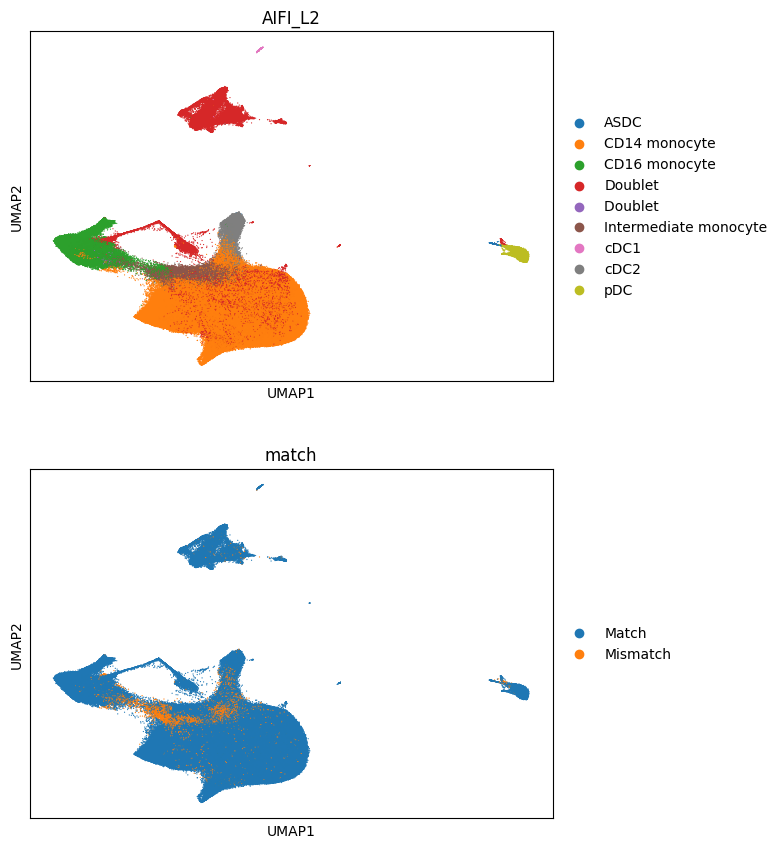

In [70]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L2', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [71]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [72]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

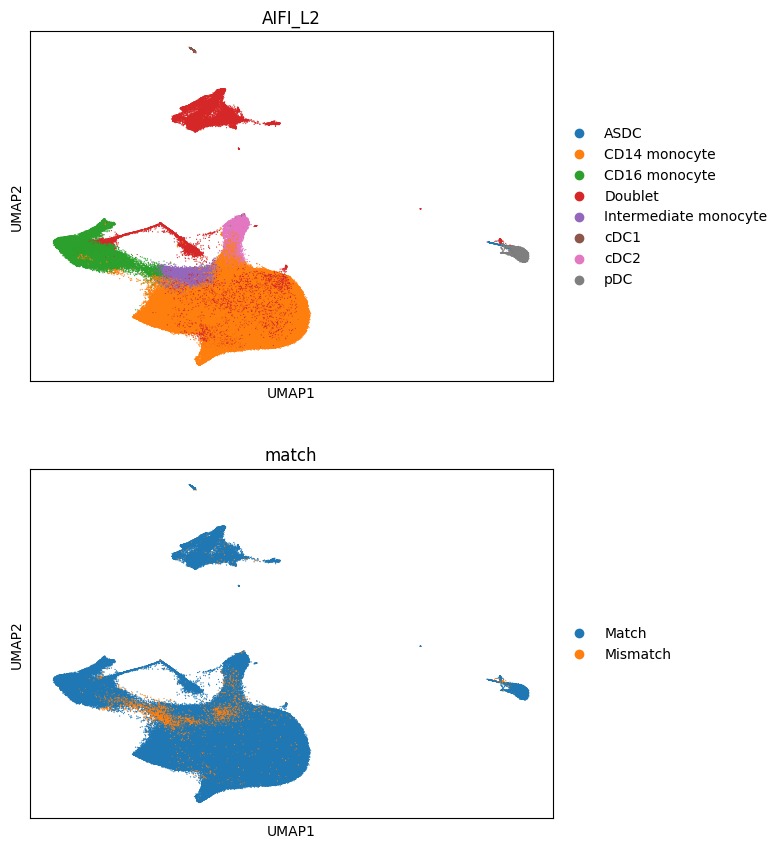

In [73]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L2', 'match'],
    ncols = 1,
    size = 3
)

## L3 Comparison

In [74]:
level = 'L3'
new_col = 'new_AIFI_' + level
old_col = 'old_AIFI_' + level

In [75]:
comp = new_labels.merge(old_labels, on = 'barcodes', how = 'outer')

In [76]:
comp[old_col] = comp[old_col].cat.add_categories(['Missing'])
comp[old_col] = comp[old_col].fillna('Missing')
old_cat = comp[old_col].cat.categories
comp[new_col] = comp[new_col].cat.set_categories(old_cat)
comp[new_col] = comp[new_col].fillna('Missing')

How many barcodes were in this category in either of the two runs?

In [77]:
n_total = comp.shape[0]
n_total

398277

How many had identical assignments?

In [78]:
n_ident = sum(comp[old_col] == comp[new_col])
n_ident

362738

What fraction is that?

In [79]:
frac_ident = n_ident / n_total
frac_ident

0.9107681337360681

What are the counts for each category in old and new annotations?

In [80]:
comp[old_col].value_counts()

old_AIFI_L3
Core CD14 monocyte       203205
ISG+ CD14 monocyte        52817
Doublet                   46107
Core CD16 monocyte        34482
Intermediate monocyte     18233
IL1B+ CD14 monocyte        8651
pDC                        7668
CD14+ cDC2                 6880
HLA-DRhi cDC2              6850
ISG+ CD16 monocyte         5864
C1Q+ CD16 monocyte         3922
cDC1                        952
ISG+ cDC2                   893
Missing                     751
Doublet                     590
ASDC                        412
Name: count, dtype: int64

In [81]:
comp[new_col].value_counts()

new_AIFI_L3
Core CD14 monocyte       217576
Doublet                   46150
ISG+ CD14 monocyte        42706
Core CD16 monocyte        36364
Intermediate monocyte     12671
IL1B+ CD14 monocyte        9046
pDC                        7587
HLA-DRhi cDC2              7353
ISG+ CD16 monocyte         5665
CD14+ cDC2                 5646
C1Q+ CD16 monocyte         3891
ISG+ cDC2                  1236
cDC1                        943
Missing                     921
ASDC                        522
Doublet                       0
Name: count, dtype: int64

What percentage of old labels changed?

In [82]:
(comp[new_col].value_counts() - comp[old_col].value_counts()) / comp[old_col].value_counts() * 100

ASDC                      26.699029
C1Q+ CD16 monocyte        -0.790413
CD14+ cDC2               -17.936047
Core CD14 monocyte         7.072168
Core CD16 monocyte         5.457920
Doublet                    0.093261
Doublet                 -100.000000
HLA-DRhi cDC2              7.343066
IL1B+ CD14 monocyte        4.565946
ISG+ CD14 monocyte       -19.143458
ISG+ CD16 monocyte        -3.393588
ISG+ cDC2                 38.409854
Intermediate monocyte    -30.505128
cDC1                      -0.945378
pDC                       -1.056338
Missing                   22.636485
Name: count, dtype: float64

Where there are mismatches, what were old labels changed to?

In [83]:
diff = comp[comp[old_col] != comp[new_col]]

In [84]:
diff[[old_col, new_col]].value_counts().head(20)

old_AIFI_L3            new_AIFI_L3          
ISG+ CD14 monocyte     Core CD14 monocyte       9960
Intermediate monocyte  Core CD14 monocyte       7200
ISG+ CD14 monocyte     Intermediate monocyte    2135
Core CD14 monocyte     ISG+ CD14 monocyte       2021
Intermediate monocyte  Core CD16 monocyte       1517
CD14+ cDC2             HLA-DRhi cDC2            1088
                       Core CD14 monocyte        958
Doublet                Missing                   877
ISG+ CD16 monocyte     Core CD16 monocyte        866
Core CD14 monocyte     IL1B+ CD14 monocyte       823
                       Intermediate monocyte     812
                       Doublet                   741
Missing                Doublet                   697
Doublet                Core CD14 monocyte        693
Core CD16 monocyte     ISG+ CD16 monocyte        682
Doublet                Core CD16 monocyte        541
Core CD16 monocyte     Intermediate monocyte     446
Core CD14 monocyte     CD14+ cDC2                445
I

In [85]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = old_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [86]:
old_adata.obs['match'] = match_values
old_adata.obs['match'] = old_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

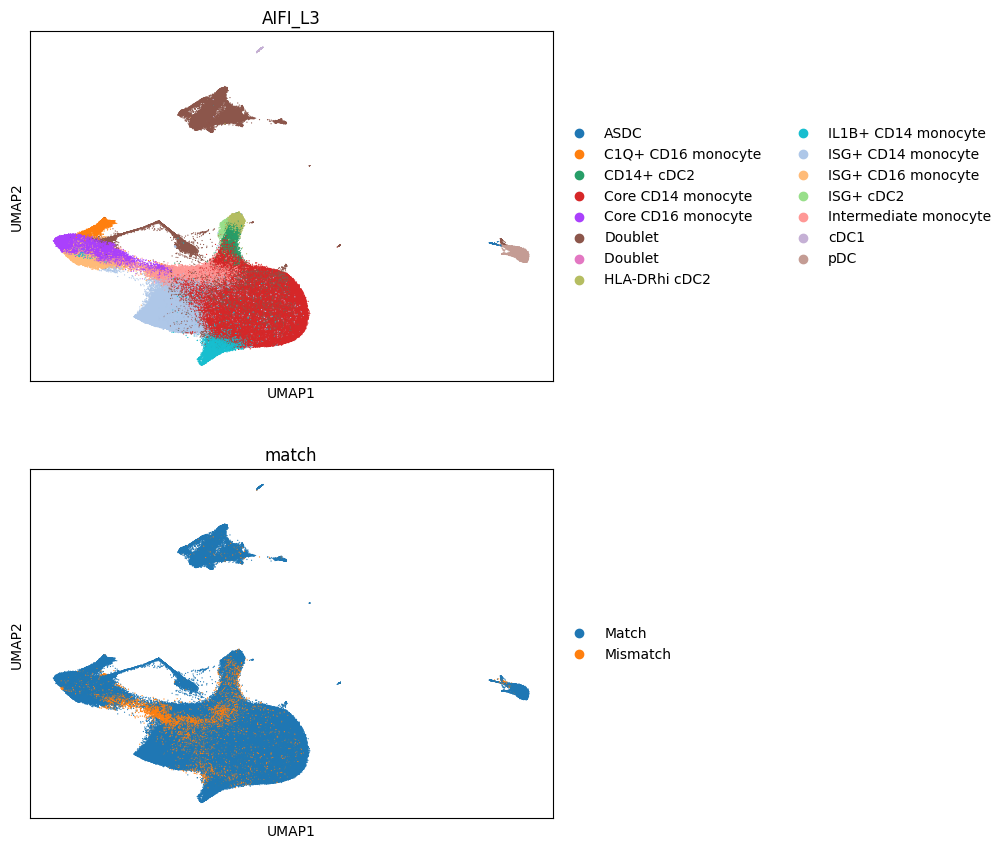

In [87]:
sc.pl.umap(
    old_adata,
    color = ['AIFI_L3', 'match'],
    ncols = 1,
    size = 3
)

Generate a plot on new coordinates showing where things differ

In [88]:
match_bc = comp['barcodes'][comp[old_col] == comp[new_col]].to_list()
match_lgl = new_adata.obs['barcodes'].isin(match_bc)
match_values = []
for lgl in match_lgl:
    if lgl:
        match_values.append('Match')
    else:
        match_values.append('Mismatch')

In [89]:
new_adata.obs['match'] = match_values
new_adata.obs['match'] = new_adata.obs['match'].astype('category')

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.10/site-packages/scanpy/plotting

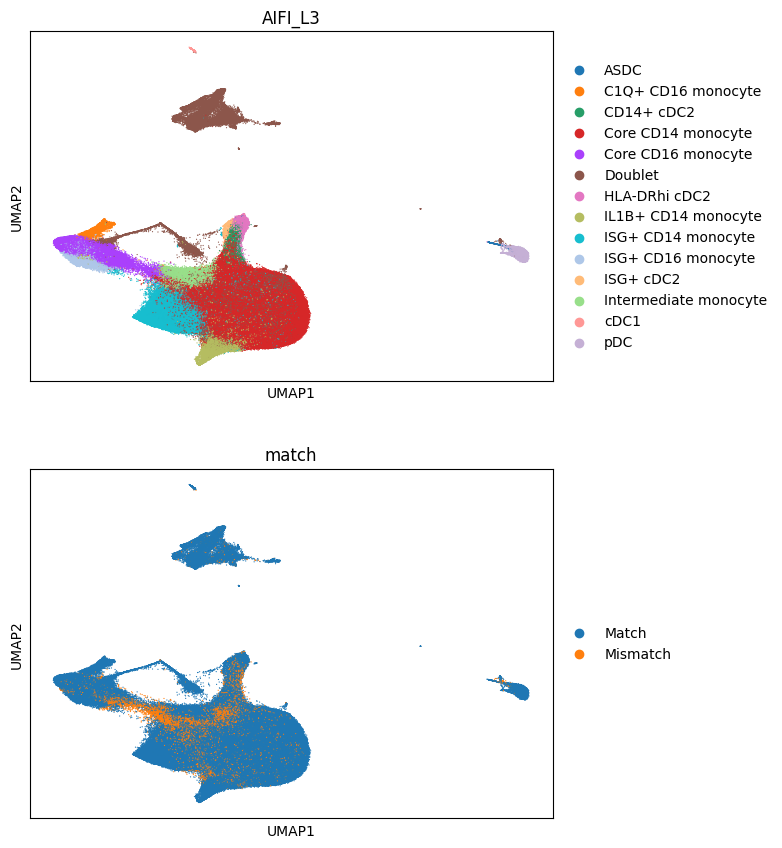

In [90]:
sc.pl.umap(
    new_adata,
    color = ['AIFI_L3', 'match'],
    ncols = 1,
    size = 3
)